In [1]:
# import python libraries
import sys, os

# Import third party libraries
import pandas as pd # type: ignore

# Dynamically get the current working directory and append 'src' to it
sys.path.append(os.path.join(os.getcwd(), "src"))
import GeeseTools as gt

In [8]:
# Creating object for DataPreProcessor Class
obj = gt(pd.read_csv("heart.csv"), target_variable="target")

In [9]:
X_train, X_test, y_train, y_test = obj.pre_process()

In [10]:
# Build & Train Model
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras import Input # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore
from sklearn.metrics import accuracy_score # type: ignore

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the ANN model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(16, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=20, batch_size=16, verbose=0)  
pass

In [11]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print(f'Accuracy: {accuracy:.2%}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy: 81.03%


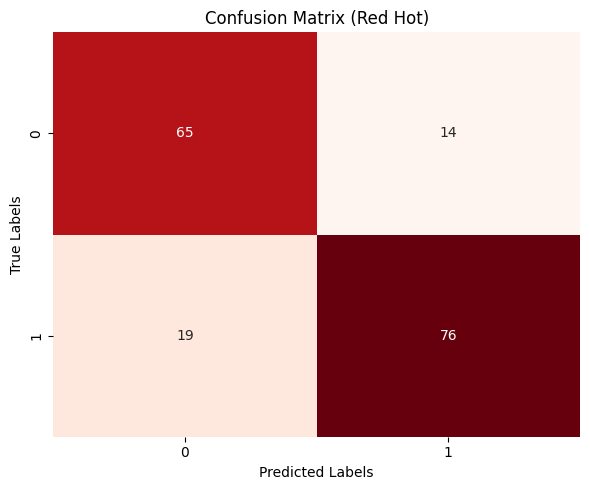

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_classes)

# Plot the confusion matrix with red shades
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Red Hot)')
plt.tight_layout()
plt.show()